### Deep Learning - Strength through diversity

Previously we messed around with using a deep learning LSTM method applied to the facies classification competition data. We made a big deal about how much better it was compared to the base-line support vector classifier. We all like to nerd out once in a while, but this isn't a very productive frame of mind. 

Fundamentally these two learners are looking at the problem in different ways, so let's see if we can make them work together, and improve our model. We do this by augmenting our feature set with the predictions made by each classifier, iterating over "blind" wells. We then train a subsequent LSTM to use this augmented feature set for prediction. This process is called model stacking, http://blog.kaggle.com/2016/12/27/a-kagglers-guide-to-model-stacking-in-practice/, and it generally happend that stacked or otherwise ensembled classifiers out-perform.

The results showed improved performance on the SHANKLE well we showed last time, both in terms of f1-score and qualitatively. The stacked classifier doesn't confuse the Wackestone (WS) with the Marine silt-stone and shales (SiSh) in the shallower section. And it does a much better job resolving Dolomite (D) from the (SiSh) deeper. 

Access this notebook on https://blasscoc.github.io/LinkedInArticles/

Other datasets and solutions to the problem can be found here:
https://agilescientific.com/blog/2016/12/8/seg-machine-learning-contest-theres-still-time

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))

import numpy as np

from sklearn.metrics import classification_report

# Convenience method from the seminal work of https://github.com/brendonhall
from competition_facies_plots import (make_facies_log_plot, 
                                      compare_facies_plot, 
                                      facies_colors)

from utils import (load_data, chunk, setup_svc, setup_lstm, 
                   train_predict_lstm, train_predict_svc,
                   WELL_NAMES)

/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


We've pushed much of the code from the notebooks to a utils library. Cleans things up.

Here we will train/predict using the SVC/LSTM. The result "all_wells" will have a PredictionSVC and a set of associate class probabilities. There's no flow of information here, each prediction is made "blind", we will use this futher down as a feature for a stack classifier.

In [2]:
all_wells = load_data()

train_predict_svc(all_wells,
                  wvars = ['GR', 'DeltaPHI', 'PE', 'PHIND',
                           'ILD_log10', 'NM_M']);

train_predict_lstm(all_wells,
                  wvars = ['GR', 'DeltaPHI', 'PE', 'PHIND',
                           'ILD_log10', 'NM_M'],                 
                  win=7,
                  batch_size = 128,
                  dropout=0.1,
                  max_epochs=80,
                  num_hidden=100,
                  num_classes=11);



CHURCHMAN BIBLE
CROSS H CATTLE
LUKE G U
NEWBY
NOLAN
Recruit F9
SHRIMPLIN
SHANKLE
CHURCHMAN BIBLE


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CROSS H CATTLE


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


LUKE G U


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NEWBY


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NOLAN


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Recruit F9


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


SHRIMPLIN


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


SHANKLE


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We've created a new "feature" out of our prediction iterating over blind wells. There's no flow of information at this point *that's important, even standardizing colllectively will be an issue*. Now train a new LSTM to use this as a new feature, the result combines the predictive power of the SVC/LSTM together, they get to be friends. The training has to be done carefully to prevent any flow of information, once again iterate over blind wells to validate the performance.

In [4]:
proba_svc = ["PredictionSVC-%d" %i for i in range(11)]
proba_lstm = ["PredictionLSTM-%d" %i for i in range(11)]
svars = ['PredictionSVC', 'PredictionLSTM'] 
_wvars = ['GR', 'DeltaPHI', 'PE', 'PHIND', 'ILD_log10', 'NM_M']

# play around here, for now just use the prediction
all_vars = _wvars + svars

train_predict_lstm(all_wells,
                   name="PredictionStacked",
                   wvars = all_vars,                 
                   win=7,
                   batch_size = 128,
                   dropout=0.1,
                   max_epochs=80,
                   num_hidden=100,
                   num_classes=11);

CHURCHMAN BIBLE


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CROSS H CATTLE


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


LUKE G U


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NEWBY


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NOLAN


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Recruit F9


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


SHRIMPLIN


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


SHANKLE


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
prediction_svc = np.hstack(
    [all_wells[well]['PredictionSVC'].values for well in WELL_NAMES])
prediction_lstm = np.hstack(
    [all_wells[well]['PredictionLSTM'].values for well in WELL_NAMES])
prediction_stacked = np.hstack(
    [all_wells[well]['PredictionStacked'].values for well in WELL_NAMES])

facies = np.hstack([
    all_wells[well]['Facies'].values for well in WELL_NAMES])

print ("\n\nHold-one/Predict Cross-Validation performance\n\n")
print(classification_report(prediction_svc, facies))
print(classification_report(prediction_lstm, facies))
print(classification_report(prediction_stacked, facies))

print ("\n\nHold-one/Predict SHANKLE-Well example\n\n")
print(classification_report(all_wells['SHANKLE']['PredictionSVC'], 
                            all_wells['SHANKLE']['Facies']))
print(classification_report(all_wells['SHANKLE']['PredictionLSTM'], 
                            all_wells['SHANKLE']['Facies']))
print(classification_report(all_wells['SHANKLE']['PredictionStacked'], 
                            all_wells['SHANKLE']['Facies']))



Hold-one/Predict Cross-Validation performance


              precision    recall  f1-score   support

           1       0.08      0.17      0.11       121
           2       0.58      0.48      0.52       892
           3       0.50      0.48      0.49       635
           4       0.40      0.43      0.42       171
           5       0.04      0.06      0.05       150
           6       0.40      0.41      0.40       453
           7       0.15      0.23      0.18        65
           8       0.52      0.45      0.48       570
           9       0.73      0.67      0.70       175

   micro avg       0.44      0.44      0.44      3232
   macro avg       0.38      0.38      0.37      3232
weighted avg       0.47      0.44      0.45      3232

              precision    recall  f1-score   support

         1.0       0.27      0.71      0.39        99
         2.0       0.72      0.53      0.61      1002
         3.0       0.52      0.61      0.56       522
         4.0       0.38     

/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


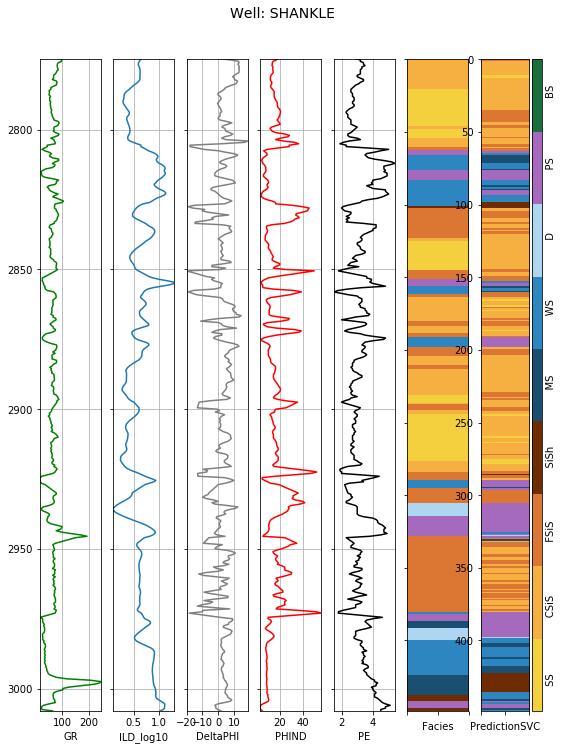

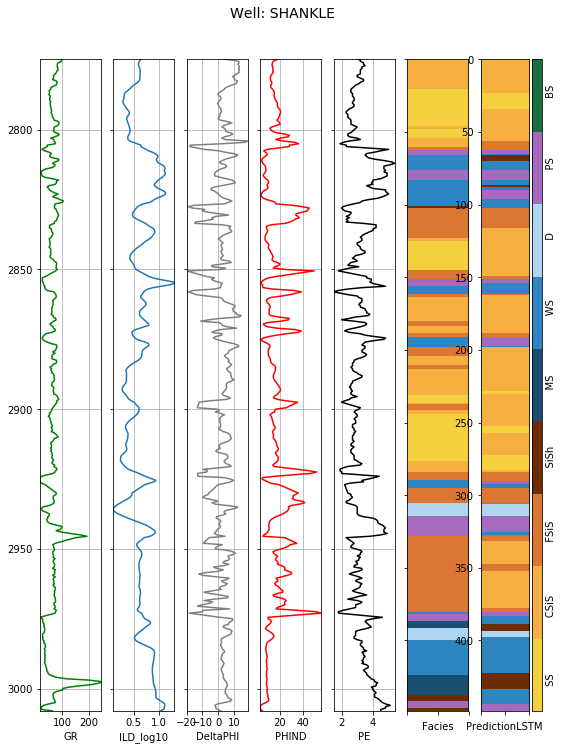

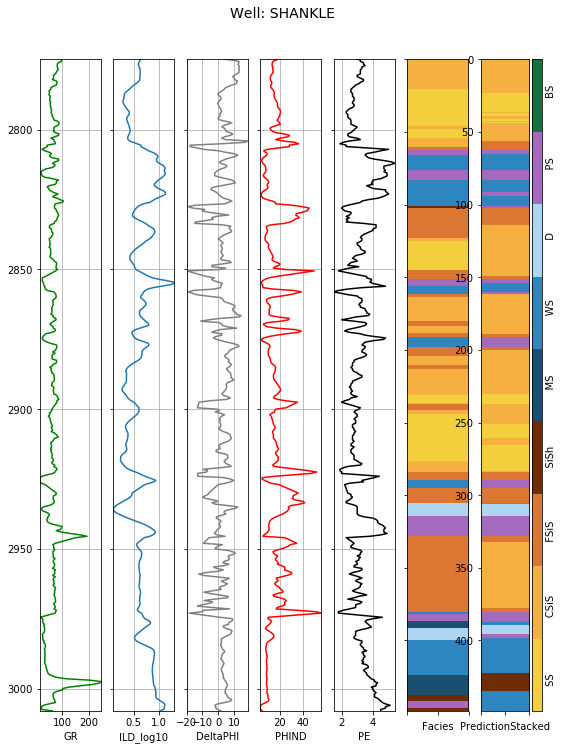

In [6]:
import matplotlib.pylab as plt
compare_facies_plot(all_wells['SHANKLE'], 
                    'PredictionSVC', facies_colors)
plt.show()
compare_facies_plot(all_wells['SHANKLE'], 
                    'PredictionLSTM', facies_colors)
plt.show()
compare_facies_plot(all_wells['SHANKLE'], 
                    'PredictionStacked', facies_colors)
plt.show()

In [7]:
proba_svc = ["PredictionSVC-%d" %i for i in range(11)]
proba_lstm = ["PredictionLSTM-%d" %i for i in range(11)]
svars = ['PredictionSVC', 'PredictionLSTM'] 
_wvars = ['GR', 'DeltaPHI', 'PE', 'PHIND', 'ILD_log10', 'NM_M']

# play around here, for now just use the prediction
all_vars = _wvars + svars + proba_lstm

train_predict_lstm(all_wells,
                   name="PredictionStacked",
                   wvars = all_vars,                 
                   win=7,
                   batch_size = 128,
                   dropout=0.1,
                   max_epochs=80,
                   num_hidden=100,
                   num_classes=11);

CHURCHMAN BIBLE


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CROSS H CATTLE


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


LUKE G U


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NEWBY


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NOLAN


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Recruit F9


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


SHRIMPLIN


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


SHANKLE


/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/.edm/envs/DeepLearning36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:326: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/Users/blasscock/Documents/Hackathon/InstaFamous/LinkedInArticles/Diversity/utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
